# 1: Frame the problem and look at the big picture

## The task
Our task in this assignment is to use housing data from California to train a Machine Learning model which attempts to predict the median house value of a district given various data about the district, such as the median income of the district, the location, population etc. 

## The plan
In order to achieve this we first need to explore and familiarize ourselves with the data, then use our observations to prepare the data so that it can be interpreted by our models. This can involve filling in holes in the data, modifying the data in various ways such as changing its scale, deriving new information from the data by combining existing data in interesting ways, and so on. Finally we will create pipelines to prepare the data automatically and test multiple ML models to see which is the best fit for our task.

First we import some libraries we know we're going to use:

In [1]:
#imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# 2: Get the data

This step is simple enough. We have downloaded the data and placed it in our project folder, now all we have to do is load it into memory and we're good to go. 

In [2]:
housing = pd.read_csv('data/housing_data.csv')
final_test = pd.read_csv('data/housing_test_data.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

These are, in order: the primary data we will be working with, the test set we will be using to validate our model at the end of the project, and an example submission showing how our final submission should look.

# 3: Explore the data

Now it's time to dive in. The easiest way to get some idea of what the data looks like is to simply look at some of it. 

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


Here we can see the various features of our data and learn some important information. We see that we have a total_rooms and a total_bedrooms feature which represents the total number of rooms and bedrooms in a district, which on their own seem somewhat useless. Perhaps we can combine these features with other features such as the number of households in order to get an idea of the average number of rooms per house in a district?

Looking into it further, we see that median_income seems to already be scaled for us, and we know that the number represents income in thousands of dollars per year. We also see that the ocean_proximity feature is a string, which is problematic for the models we expect to use, so this will need to be transformed somehow.

The Pandas info() function can help us gain more insight about the data.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Here we can see that the set contains 16512 entries, but not all columns are full. The total_bedrooms column is missing in a small number of districts. Given how insignificant the number seems, we may get away with simply removing the incomplete entries, but we would also need to do that for new data which means our model wouldn't work unless the new data also had that feature. Another way to deal with it could be to simply remove the column, but this could be sacrificing a lot of valuable information. It may be best to use an imputer to simply fill in values for the missing data.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

Looking closer at the ocean_proximity feature reveals that there are five different categories, perhaps we could simply convert these to numerical categories, or explore more sophisticated approaches.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Here we can see a lot of statistical information about the data. We can see that the maximum value for the median_income and median_house_value features seem suspiciously round, and we know that this is because those values are capped at an income of \\$150,000 and a median house value of \\$500,000. It may be beneficial to create categories for these features.

Another way to explore the data is to use various types of charts 

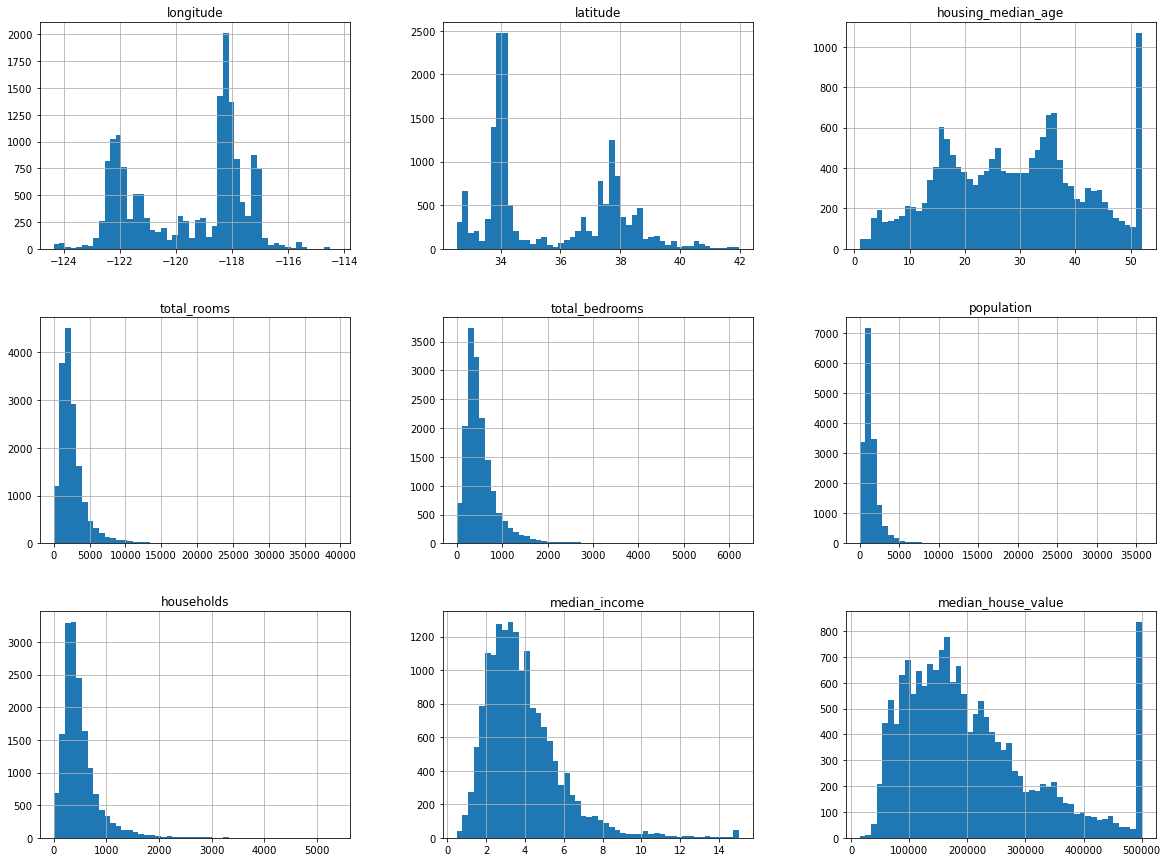

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

plt.show()

Here we can get a feel for the distributions of the different features. We can also see that cap on median house value affects quite a lot of districts, that the cap on median income does not affet a lot of districts, and that there also appears to be a cap on the median age feature, which we didn't notice earlier. 

## Split the data
Before going further, we split the data into a training set and a test set. This is done to allow us to test our model on data we haven't trained it on, as testing on the same data used to train is pointless.

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

We split the median_income feature into categories and use the StratifiedShuffleSplit class to stratify the training and test sets based on the median income of a district, this ensures that both sets get a somewhat even distribution of features. If we simply used random selection we could end up with a training or test set with few or none of certain income brackets, which would be less than ideal. 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

#for set_ in (strat_train_set, strat_test_set):
 #   set_.drop("income_cat", axis=1, inplace=True)

In [10]:
strat_train_set = strat_train_set.drop(['income_cat'], axis=1)
strat_test_set= strat_test_set.drop(['income_cat'], axis=1)

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY,3
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND,5
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN,5
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN,5
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY,2


## Exploring the data a bit further
Now that we have separated our training data from our test data, we can continue exploring the data. It is important to not explore the test data as doing so could introduce subconscious bias, causing us to make mistakes such as overfitting. 

We copy the training set, allowing us to make experimetal changes without altering the original data.

In [12]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

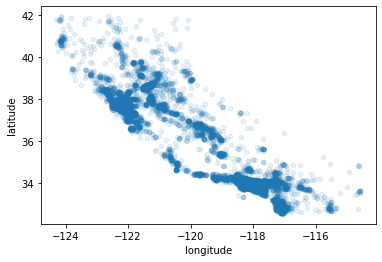

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Here we can see that the entries seem to be concentrated in certain areas, primarily San Francisco and Los Angeles. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

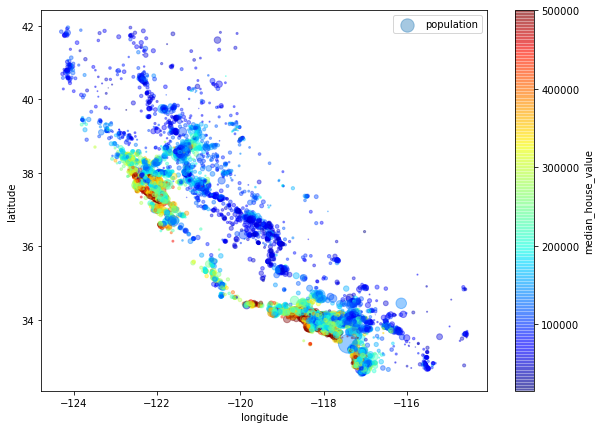

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Plotting the location and using median_house_value to color the entries shows that the value appears to increase in the cities.

Another way to explore the data is to create a correlation matrix. This will reveal whether any of the features show correlation with the median house value, however it only shows linear correlations which means features which appear to be unrelated may just be non-linearly correlated. For example you can see that latitude and longitude do not appear to correlate with housing value, whereas it seems like they certainly are when looking at the heatmap above. This is because the correlation is not linear.

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685704
total_rooms           0.133077
housing_median_age    0.106092
households            0.063955
total_bedrooms        0.047995
population           -0.026638
longitude            -0.041681
latitude             -0.149024
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

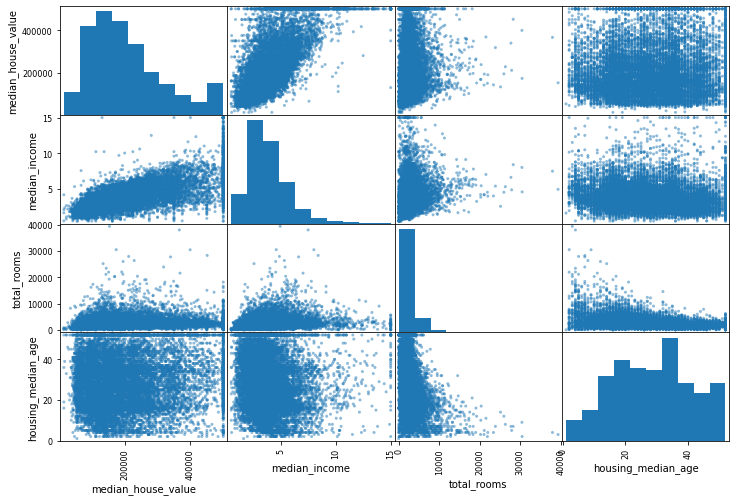

In [17]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

We can tell that there certainly seems to be a correlation between the median income and the median house value.

As mentioned earlier, we can derive some new information from the data in order to potentially gain new insights. Here we create three new features: rooms per household, bedrooms per household, bedrooms per room and population per household 

In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [19]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685704
rooms_per_household         0.193628
total_rooms                 0.133077
housing_median_age          0.106092
households                  0.063955
total_bedrooms              0.047995
population_per_household   -0.025622
population                 -0.026638
longitude                  -0.041681
bedrooms_per_household     -0.070610
latitude                   -0.149024
bedrooms_per_room          -0.255611
Name: median_house_value, dtype: float64

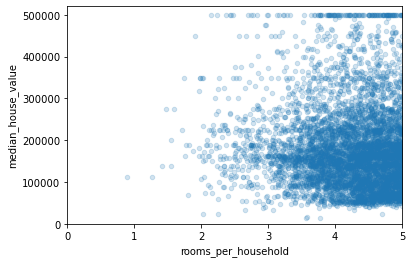

In [20]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

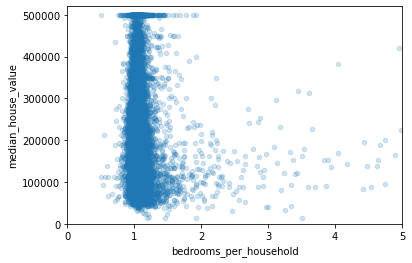

In [21]:
housing.plot(kind="scatter", x="bedrooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

We can see that rooms per household seems to correlate linearly with median house value, whereas bedrooms per household does not seem very useful as the vast majority of districts average a single bedroom per household. 

In [22]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
count,13209.000000,13209.000000,13209.000000,13209.000000,13083.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13083.000000,13083.000000,13209.000000
mean,-119.563785,35.619523,28.704141,2636.232493,537.885347,1428.444318,500.317511,3.873968,207606.217579,5.393556,1.089033,0.213094,3.100253
std,1.997009,2.131178,12.542755,2189.868049,421.182686,1132.388993,383.258223,1.909787,116027.578521,1.901080,0.324553,0.058043,12.181447
min,-124.300000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.500000,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1442.000000,294.000000,787.000000,279.000000,2.570100,120300.000000,4.440909,1.005316,0.175105,2.432727
50%,-118.490000,34.250000,29.000000,2116.000000,433.000000,1163.000000,409.000000,3.528800,180500.000000,5.227778,1.048837,0.203221,2.825480
75%,-118.010000,37.700000,37.000000,3140.000000,646.000000,1728.000000,603.000000,4.746300,265500.000000,6.057576,1.098592,0.239916,3.285347
max,-114.560000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,59.875000,15.312500,1.000000,1243.333333


# 4: Prepare the data

Now that we've learned some valuable information about the data we're working with, it's time to prepare the data so that our machine learning algorithms can make good use of it. 
First, we separate the training set into the actual training data and the labels. 

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11433,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN
16207,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND
5506,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,INLAND
7062,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY
4672,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY


Now it's time to deal with our incomplete entries. As noted earlier, some entries are missing the total_bedrooms field. Some ways to deal with this could be to simply remove the incomplete entries, remove the feature from all entries, or impute the value by simply setting it to the median value. In any case, it seems useful to have a feature indicating whether the value was present or not, so let's do that first.

In [25]:
housing["missing_bedrooms"] = housing["total_bedrooms"].isna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,missing_bedrooms
12502,-118.15,34.12,52.0,1518.0,344.0,725.0,296.0,3.4018,<1H OCEAN,False
3675,-117.88,34.12,34.0,912.0,165.0,522.0,150.0,4.0417,<1H OCEAN,False
8033,-121.09,37.33,40.0,524.0,112.0,329.0,96.0,1.7188,INLAND,False
10494,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,<1H OCEAN,False
1457,-122.40,37.72,37.0,971.0,248.0,647.0,208.0,2.1187,NEAR BAY,False


Now, for estimating the bedrooms feature we can see from the description above that the number of bedrooms per district ranges from one to over six thousand. The median can be calculated with 

In [26]:
housing["total_bedrooms"].median()

433.0

and given our earlier observation that the vast majority of district have an average of slightly above 1 bedroom per household, it seems naive to just set it to 433 wherever it's missing. It seems we can derive a far more accurate estimate by simply setting the number of bedrooms to equal the number of households, possibly a little more. We can see above that 50% of households have below 1.048 bedrooms per household, so maybe 1.048 is a good estimate. We will test this against the more naive imputer approach to see which appears to perform better. 

In [27]:
housing_beds_est = housing.copy()
mask = housing_beds_est["missing_bedrooms"]
housing_beds_est.loc[mask, "total_bedrooms"] = housing_beds_est.loc[mask, "households"] * 1.048

Now we should have a dataframe where all the missing bedrooms have been filled in with slightly more than the number of households in that district. Let's test that assumption just to make sure we didn't mess something up.

In [28]:
housing_beds_est.loc[mask].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,missing_bedrooms
11433,-117.87,33.83,27.0,2287.0,367.848,1140.0,351.0,5.6163,<1H OCEAN,True
16207,-119.69,36.83,32.0,1098.0,234.752,726.0,224.0,1.4913,INLAND,True
5506,-117.65,34.04,15.0,3393.0,640.328,2039.0,611.0,3.9336,INLAND,True
7062,-122.17,37.75,38.0,992.0,271.432,732.0,259.0,1.6196,NEAR BAY,True
4672,-122.22,38.08,37.0,2811.0,540.768,1574.0,516.0,3.1053,NEAR BAY,True


Looks like everything is in order!

Now that we have estimated the missing bedrooms feature and added a feature indicating whether the feature has been estimated, we will create another dataset using SimpleImputer where we simply replace the missing values with the median value. If the estimate turns out to work well, we can create a final pipeline where we use both strategies, so that any other missing fields get imputed using the simple approach. 

## Pipelines

In order to automate the process, it is best to create pipelines so that all the steps are easily repeatable and easily modifiable. We will start this process now. We use the CombinedAttributesAdder as suggested in the book and create our own estimator for dealing with the missing bedrooms.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        bedrooms_per_household = X[:, bedrooms_ix] / X[:, households_ix]
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]

In [30]:
class BedroomFixer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["missing_bedrooms"] = X["total_bedrooms"].isna()
        mask = X["missing_bedrooms"]
        X.loc[mask, "total_bedrooms"] = X.loc[mask, "households"] * 1.048
        return np.c_[X]

Here we define our first pipeline, which will deal with the missing bedrooms, impute any values still missing, add the combined attributes like rooms per household etc, and scale all the values to be within similar ranges. 

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

X = strat_train_set.copy().drop(['median_house_value'],axis=1)

num_pipeline = Pipeline([
        ('bedroomFixer', BedroomFixer()),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

We define a new pipeline which gets rid of the string values for the feature ocean_proximity and replaces them with "one hot" encoded values.  

In [32]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(X.drop("ocean_proximity", axis=1))),
        ("cat", OneHotEncoder(), ['ocean_proximity']),
    ])

Finally, we define two pipelines with predictors, using the previously defined pipeline for data preparation and Linear Regression and Random Forest predictors for the actual predictions. 

In [33]:
full_pipeline_lr = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression()),
    ])

In [34]:
full_pipeline_rf = Pipeline([
        ("preparation", full_pipeline),
        ("randomForest", RandomForestRegressor(n_estimators=100, random_state=42, max_features=8)),
    ])

## 5: Explore different models

Technically the step says to explore many different models, we're exploring two. 

We fit our two models to the training data:

In [53]:
housing_labels = strat_train_set["median_house_value"].copy()

full_pipeline_rf.fit(X, housing_labels)
full_pipeline_lr.fit(X, housing_labels)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12502,-118.15,34.12,52.0,1518.0,344.0,725.0,296.0,3.4018,<1H OCEAN
3675,-117.88,34.12,34.0,912.0,165.0,522.0,150.0,4.0417,<1H OCEAN
8033,-121.09,37.33,40.0,524.0,112.0,329.0,96.0,1.7188,INLAND
10494,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,<1H OCEAN
1457,-122.40,37.72,37.0,971.0,248.0,647.0,208.0,2.1187,NEAR BAY


Then we see how the models perform on the test set

In [54]:
test_pred_rf = full_pipeline_rf.predict(strat_test_set.drop(['median_house_value'],axis=1))
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3039,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
6949,-121.80,37.30,16.0,906.0,149.0,605.0,148.0,4.8173,235600.0,<1H OCEAN
13258,-118.46,34.05,25.0,6902.0,2138.0,3136.0,1844.0,2.6509,410000.0,<1H OCEAN
168,-118.25,33.97,38.0,1231.0,346.0,1217.0,354.0,1.8661,106600.0,<1H OCEAN
751,-119.50,36.62,34.0,1440.0,267.0,1018.0,265.0,2.2206,63400.0,INLAND


In [40]:
test_pred_lr = full_pipeline_lr.predict(strat_test_set.drop(['median_house_value'],axis=1))

Mean squared error is a good way to see how well our model performs. We define a function to measure it in order to avoid code duplication.

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def mse(labels, predictions):
    lin_mse = mean_squared_error(labels, predictions)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [43]:
test_labels = strat_test_set['median_house_value']
mse(test_labels, test_pred_rf)

49076.95021745298

In [44]:
mse(test_labels, test_pred_lr)

67313.73856093679

We can see that the random forest model appears to perform significantly better than the linear regression model. 

Next we display feature importances to get some idea of what the most important features are. First we need this huge mess to get the actual feature names after pipeline. Just ignore that. Taken from https://stackoverflow.com/questions/57528350/can-you-consistently-keep-track-of-column-labels-using-sklearns-transformer-api/57534118#57534118

In [45]:
from sklearn.feature_selection import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin

def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

Now we just use that to get the feature names

In [46]:
feature_names = pd.DataFrame(strat_test_set.drop(['median_house_value'],axis=1), 
             columns=get_ct_feature_names(full_pipeline)).keys().values

In [47]:
feature_importances = full_pipeline_rf.steps[1][1].feature_importances_
sorted(zip(feature_importances, feature_names), reverse=True)

[(0.35588337524279345, 'median_income'),
 (0.10768833195230859, 'ocean_proximity_ISLAND'),
 (0.07079019086746592, 'ocean_proximity_NEAR BAY'),
 (0.06875912684876433, 'longitude'),
 (0.06318572556083668, 'latitude'),
 (0.045532201075623176, 'ocean_proximity_INLAND'),
 (0.04107995646319944, 'housing_median_age'),
 (0.02120182530599135, 'ocean_proximity_NEAR OCEAN'),
 (0.015396068435934232, 'total_rooms'),
 (0.015060832130638744, 'population'),
 (0.014564875036716945, 'total_bedrooms'),
 (0.01365000993621246, 'households'),
 (0.0003598607249522376, 'ocean_proximity_<1H OCEAN')]

It seems like we're missing a few of the feature names here, but by our understanding the ones printed are correct. We're not sure what the others are, there's too much magic going on here. In any case, we observe that the features total_rooms, population, total_bedrooms and households all seem pretty insignificant. Let's try removing them. First we need a slightly different pipeline.

# 6: Fine-tune your models

We didn't end up saving the actual process of this, but the results of our fine-tuning are as follows:

### RandomForest:
    with all 50049.62202496922
    without STD 50076.37538883127
    without (STD & Bedroom) 50029.486144626004
    without bedroom 49994.825198011175
    
### Linear Regression
    with all 67339.69109664545 
    without STD  67339.69109664588
    without (STD & Bedroom) 67589.9086376503
    without bedroom 67589.90863765022

### Removing parameters from Random Forest

    ['households','total_bedrooms','population'] 
    49288.761136536006

    ['households','total_bedrooms']
    48536.065662783905
 

    ['total_bedrooms','population']
    49371.05699788159

    ['households','population'] 
    49406.135838061804

    ['households']
    48954.65039818802

    ['total_bedrooms']
    48794.04314189167

    ['population']
    49554.09573726059

## Submission

For the submission we have chosen to go with the Random Forest algorighm. It seems to perform very well, especially when we limit the max_features. We're speculating that it may be ignoring the least important features. 

In order to improve our score we are training our algorithm on the entire dataset.

In [58]:
housing = pd.read_csv('data/housing_data.csv')

full_pipeline_rf.fit(housing.drop("median_house_value", axis=1), housing["median_house_value"]);

In [59]:

submission_pred = full_pipeline_rf.predict(final_test.drop("Id", axis=1))

submission = pd.DataFrame({'Id': final_test['Id'], 'median_house_value': submission_pred})


In [60]:
submission.head()

,Id,median_house_value
0,0,233038.03
1,1,248762.00
2,2,78079.00
3,3,166387.01
4,4,48278.00


Submission looks good.

In [61]:
submission.to_csv('submission.csv', index=False)

All done!